In [17]:
# Import library yang diperlukan
import pandas as pd

# Path file yang diunggah
file_path = "/mnt/data/diabetes.csv"

# Membaca dataset
df = pd.read_csv("diabetes.csv")

# Menampilkan informasi awal dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  )

C:\Users\Lenovo Gaming 3i\AppData\Local\Temp\ipykernel_24044\1289992937.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df, palette="coolwarm")


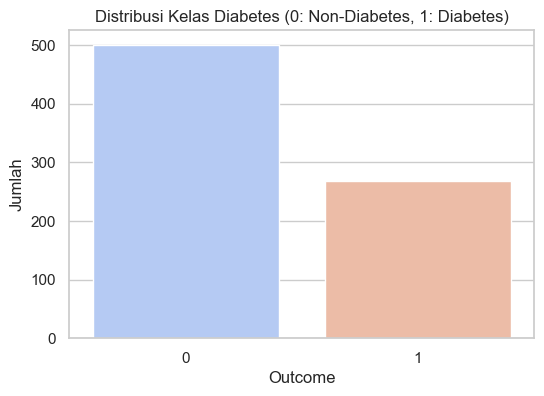

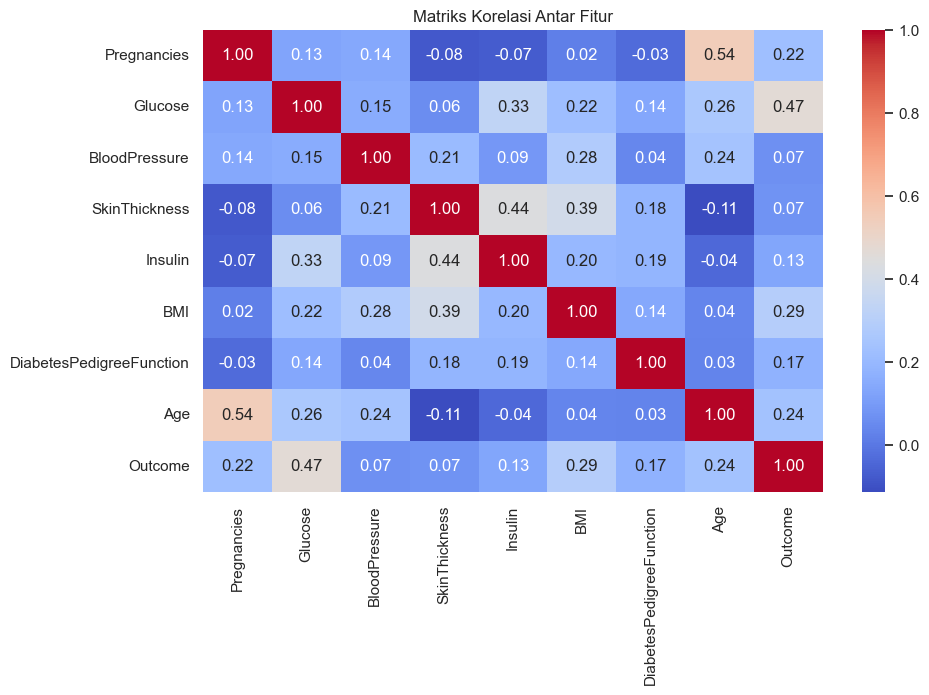

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style seaborn
sns.set(style="whitegrid")

# Visualisasi distribusi kelas target (Outcome)
plt.figure(figsize=(6, 4))
sns.countplot(x="Outcome", data=df, palette="coolwarm")
plt.title("Distribusi Kelas Diabetes (0: Non-Diabetes, 1: Diabetes)")
plt.xlabel("Outcome")
plt.ylabel("Jumlah")
plt.show()

# Visualisasi korelasi antar fitur
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Antar Fitur")
plt.show()


In [14]:
# Import library untuk machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model tanpa data preparation
model_no_prep = RandomForestClassifier(random_state=42)
model_no_prep.fit(X_train, y_train)
y_pred_no_prep = model_no_prep.predict(X_test)

# Evaluasi model tanpa data preparation
accuracy_no_prep = accuracy_score(y_test, y_pred_no_prep)

# Data preparation (standarisasi)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model dengan data preparation
model_prep = RandomForestClassifier(random_state=42)
model_prep.fit(X_train_scaled, y_train)
y_pred_prep = model_prep.predict(X_test_scaled)

# Evaluasi model dengan data preparation
accuracy_prep = accuracy_score(y_test, y_pred_prep)

accuracy_no_prep, accuracy_prep


(0.7597402597402597, 0.7597402597402597)

In [15]:
import joblib

# Simpan model di direktori kerja
joblib.dump(model_no_prep, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model dan scaler berhasil disimpan!")


Model dan scaler berhasil disimpan!
